# Gain vs resolution

* number and distribution of unique values

### Setup

activate spikeinterf..

In [17]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
import spikeinterface as si 
import spikeinterface.preprocessing as spre
from matplotlib import pyplot as plt

# DATASETS

# SILICO MARQUES RAW
data_conf_sili, _ = get_config("silico_neuropixels", "concatenated").values()

GAIN_NONE = data_conf_sili["preprocessing"]["output"]["40m"][
        "trace_file_path_noise_none_gain_none_int16"
    ]

GAIN_500 = data_conf_sili["preprocessing"]["output"]["40m"][
        "trace_file_path_noise_none_gain_500_int16"
    ]

GAIN_1e3 = data_conf_sili["preprocessing"]["output"]["40m"][
        "trace_file_path_noise_none_gain_1e3_int16"
    ]
GAIN_5000 = data_conf_sili["preprocessing"]["output"]["40m"][
        "trace_file_path_noise_none_gain_5000_int16"
    ]
GAIN_1e4 = data_conf_sili["preprocessing"]["output"]["40m"][
        "trace_file_path_noise_none_gain_1e4_int16"
    ]
GAIN_1e5 = data_conf_sili["preprocessing"]["output"]["40m"][
        "trace_file_path_noise_none_gain_1e5_int16"
    ]
GAIN_1e6 = data_conf_sili["preprocessing"]["output"]["40m"][
        "trace_file_path_noise_none_gain_1e6_int16"
    ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-06-03 14:13:12,036 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-03 14:13:12,110 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [2]:
# list available traces
data_conf_sili["preprocessing"]["output"]["40m"]

{'trace_file_path_noise_none_gain_none_int16': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/preprocessed/trace_file_path_noise_none_gain_none_int16',
 'trace_file_path_noise_none_gain_500_int16': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/preprocessed/trace_file_path_noise_none_gain_500_int16',
 'trace_file_path_noise_none_gain_1e3_int16': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/preprocessed/trace_file_path_noise_none_gain_1e3_int16',
 'trace_file_path_noise_none_gain_5000_int16': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/preprocessed/trace_file_path_noise_none_gain_5000_int16',
 'trace_file_path_noise_none_gain_1e4_int16': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_cam

In [3]:
# noise none gain none
def get_rez(recording_path: str):
    """_summary_
    takes 4 min for 100 min recording

    Args:
        recording_path (_type_): _description_

    Returns:
        _type_: _description_
    """
    Prep40m = si.load_extractor(recording_path)
    Prep10m = Prep40m.frame_slice(start_frame=0, end_frame=10 * 60 * 40000)
    Prep10mInt16 = spre.astype(Prep10m, "int16")
    assert Prep10mInt16.dtype == "int16"
    return Prep10mInt16.get_traces()

In [4]:
# (4m) get traces
rez_none = get_rez(GAIN_NONE)
rez_500 = get_rez(GAIN_500)
rez_1e3 = get_rez(GAIN_1e3)
rez_5000 = get_rez(GAIN_5000)
rez_1e4 = get_rez(GAIN_1e4)
rez_1e5 = get_rez(GAIN_1e5)
rez_1e6 = get_rez(GAIN_1e6)

In [5]:
# (36m) get resolution (number of unique values)
gain_none = np.unique(rez_none)
gain_500 = np.unique(rez_500)
gain_1e3 = np.unique(rez_1e3)
gain_5000 = np.unique(rez_5000)
gain_1e4 = np.unique(rez_1e4)
gain_1e5 = np.unique(rez_1e5)
gain_1e6 = np.unique(rez_1e6)

In [9]:
# (36m) get resolution (number of unique values)
n_none = len(gain_none)
n_500 = len(gain_500)
n_1e3 = len(gain_1e3)
n_5000 = len(gain_5000)
n_1e4 = len(gain_1e4)
n_1e5 = len(gain_1e5)
n_1e6 = len(gain_1e6)

Text(0, 0.5, 'resolution')

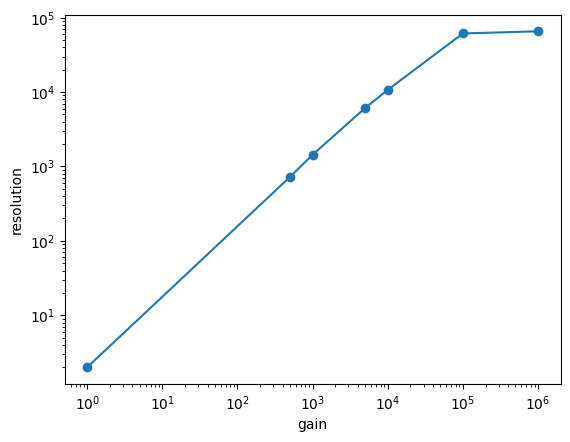

In [35]:
plt.plot(
    [1, 500, 1e3, 5000, 1e4, 1e5, 1e6],
    [
        n_none,
        n_500,
        n_1e3,
        n_5000,
        n_1e4,
        n_1e5,
        n_1e6,
    ],
    "-o",
)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("gain")
plt.ylabel("resolution")